# Investigating Open-Ended Questions

## Table of Contents
- [Investigating Open-Ended Questions](#Investigating-Open-Ended-Questions)
  - [Introduction](#Introduction)
  - [Objectives](#Objectives)
  - [Tasks](#Tasks)
  - [Considerations](#Considerations)
  - [Environment Setup](#Environment-Setup)
  - [RMS Lusitania (Sunken Ship)](#RMS-Lusitania-(Sunken-Ship))
    - [Questions Task 1](#Questions-Task-1)
  - [Scientists Salaries](#Scientists-Salaries)
    - [Questions Task 2](#Questions-Task-2)
  - [Resources](#Resources)

## Introduction
This assignment includes specific tasks to investigate open-ended questions. The open-ended questions ask us to think creatively and critically about how the plots we have created provide insight into the data.

## Objectives
- Getting familiar with `numpy`, `pandas`, and `matplotlib` libraries by looking at RMS Lusitania dataset.
- Getting some insight into scientists' salaries by looking at the dataset provided.

## Tasks
- Investigate the RMS Lusitania dataset.
- Investigate the scientists' salaries dataset.

## Considerations 
- It's important to note that thorough analysis and interpretation of our findings and visualizations are crucial for a comprehensive evaluation in this section.
- Based on what we have learnt so far, we need to apply different visualization techniques. Also, we need to check the distribution of variables. It’s up to us to decide which plot suits well for which variable(s). our task will be considered ‘successful’ if we have gained enough insights from this dataset.

## Environment Setup

Let's begin with setting up the Python environment and installing necessary libraries.


In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


In [22]:
TASK_1_CSV = "../data/task1.csv"
TASK_2_CSV = "../data/task2.csv"

## RMS Lusitania (Sunken Ship)

The provided dataset(task1.csv) contains information about the passengers of the sunken ship ‘RMS Lusitania’.  This is a brief explanation of the columns in the given dataset:

- **survived**: Indicates if a passenger survived (1) or not (0). 
- **pclass**: The ticket class (1 = First class, 2 = Second class, 3 = Third class). 
- **sex**: The passenger's sex (male or female). 
- **age**: The passenger's age in years. 
- **sibsp**: The number of siblings or spouses the passenger had aboard the ship. 
- **parch**: The number of parents or children the passenger had aboard the ship. 
- **fare**: The fare the passenger paid for the ticket. 
- **embarked**: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).
- **class**: The class of the ticket the passenger had (First, Second, or Third). 
- **who**: Categorizes passengers as 'man', 'woman', or 'child', likely derived from age and sex.
- **adult_male**: A boolean indicating if the passenger is an adult male or not. 
- **deck**: The deck the passenger's cabin was on, indicated by letters.
- **embark_town**: The town from which the passenger embarked, corresponding to the 'embarked' codes.
- **alive**: Indicates if the passenger survived ('yes') or not ('no')

### Questions Task 1

1. First, we read the file using the pandas library and save it in a pandas dataframe. Then, using the methods 'info', 'head', 'tail', 'describe' from the pandas library, we examine the general structure of the data, and explain what information each of the outputs shows.

In [23]:
df = pd.read_csv(TASK_1_CSV)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [27]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. We first show the type of each data column. Some columns are of type categorical and some are of type numerical from the pandas library info. To process the non-numerical columns, one of the possible methods is labeling; in such a way that each of the categories is replaced by a number. For example, in this dataset, there is a categorical column named sex, which includes values Male and Female. By modify the values of this column, each of these models is mapped to one of the numbers in the range [0,1].

In [28]:
label_encoder = LabelEncoder()

labels : dict[str, np.ndarray] = {}
for column in df.columns:
    if df[column].dtype == "object":
        labels[column] = df[column].unique()
        df[column] = label_encoder.fit_transform(df[column])
        

In [29]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,2,0,True


3. Generating a heatmap of the correlation matrix for numerical features in the dataset.

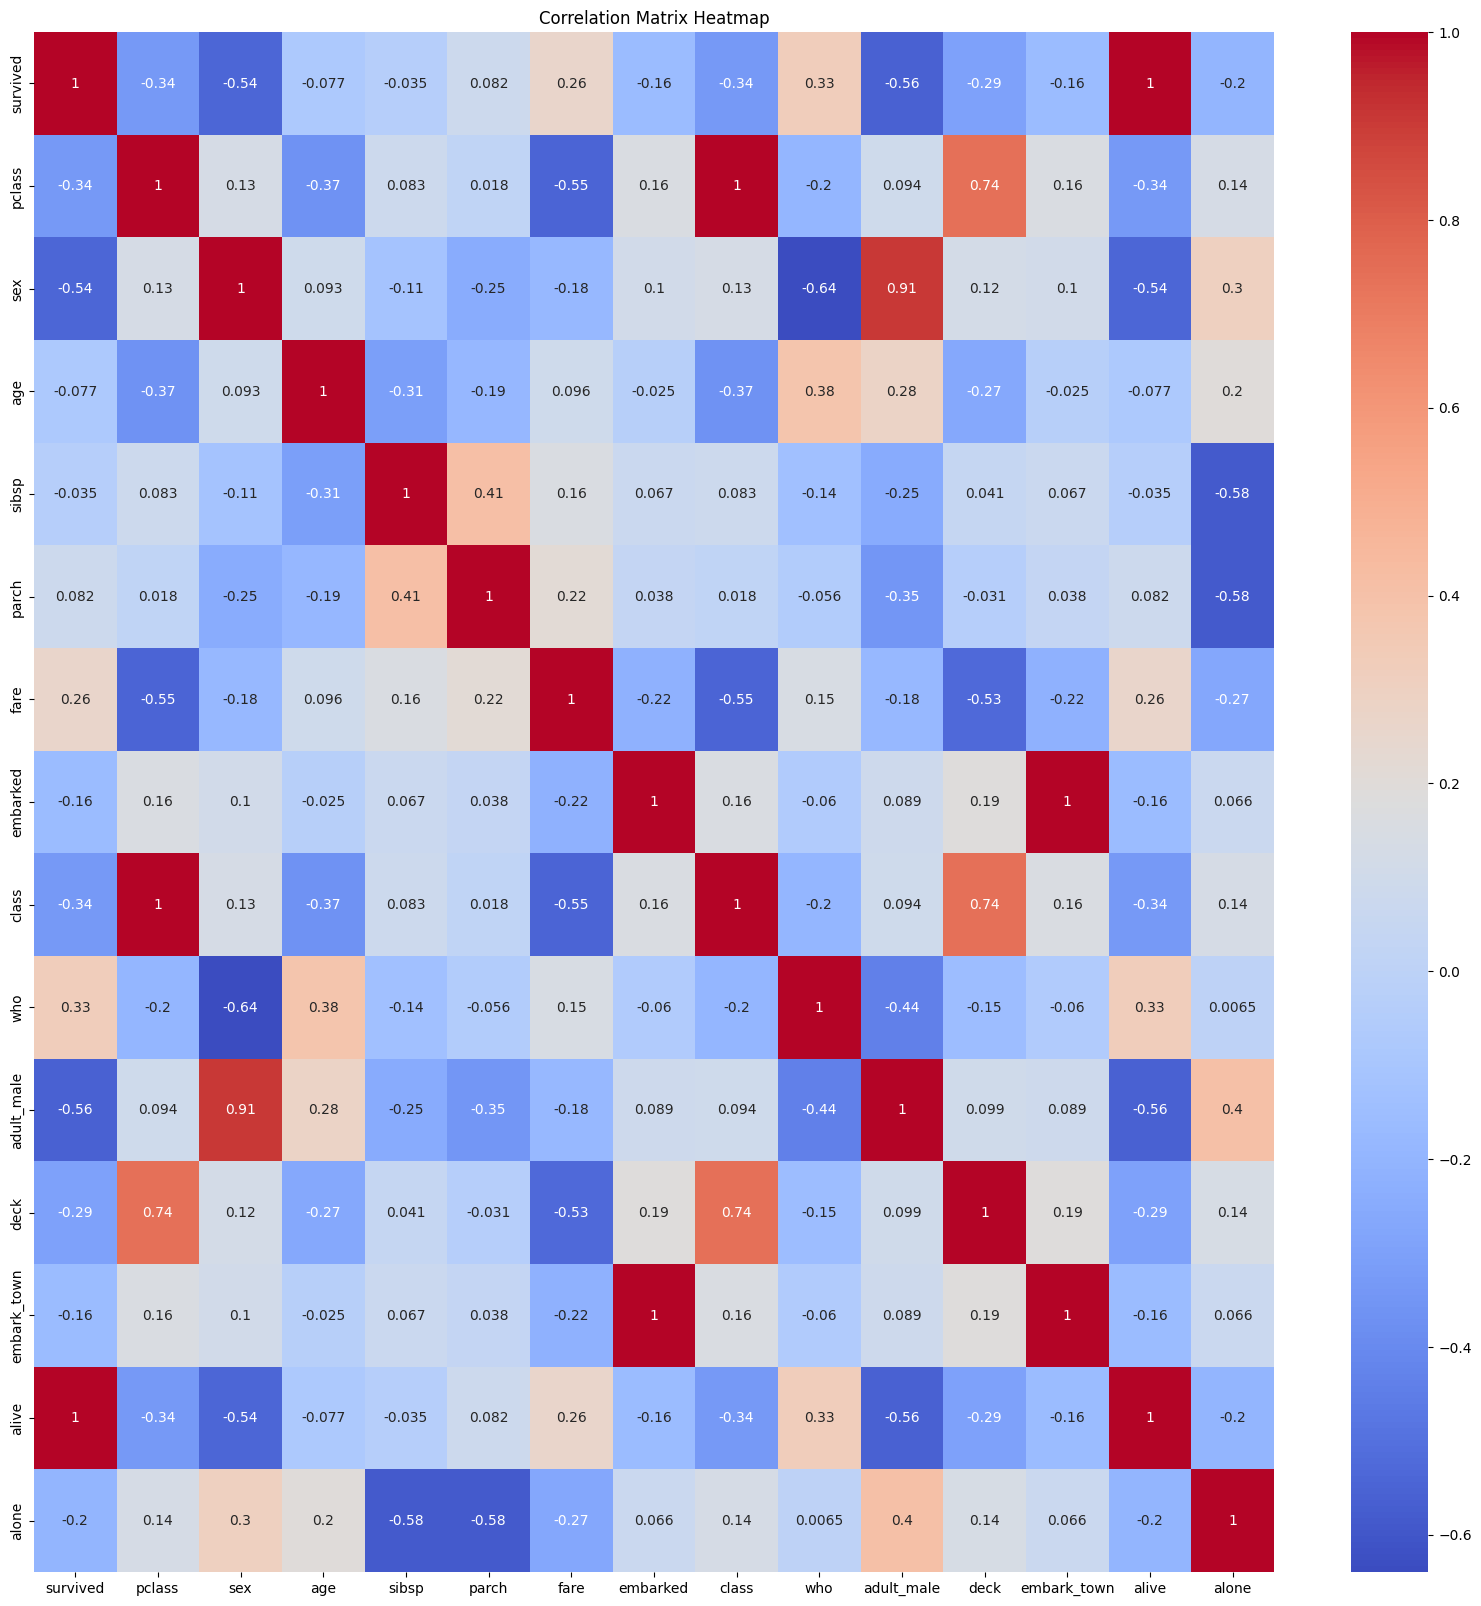

In [30]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

4. Columns that are not on the main diagonal and have a correlation of 1 mean that one column is extra and can be removed. Therefore, based on this, we delete the extra columns that meet these conditions.

In [31]:
corr_matrix = df.corr()

columns_to_remove = []
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if corr_matrix.iloc[i, j] == 1:
            if corr_matrix.columns[j] != "class": # Do not remove the class column for further use
                columns_to_remove.append(corr_matrix.columns[j])

df = df.drop(columns=columns_to_remove)

In [32]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,True


5. Number of passengers survived (survived == 1) the disaster

In [33]:
survived_count = df[df["survived"] == 1]["survived"].sum()
print(survived_count)

342


6. Number of female passengers aged more than 30 years

In [34]:
female_old_passengers = df[(df["sex"] == 0) & (df["age"] > 30)]
num_female_passengers = len(female_old_passengers)
print(num_female_passengers)

103


7. Identifying passengers who embarked from Cherbourg ('C') and paid a fare greater than $100

In [35]:
cherbourg_passengers_with_fare_more_than_100 = df[
    (df["embarked"] == labels["embarked"].tolist().index("C")) &
    (df["fare"] > 10)
]
print(len(cherbourg_passengers_with_fare_more_than_100))

23


8. Identifying columns with missing values. Proposing and applying a strategy for handling these missing values

Handling missing values is a crucial step in the data preprocessing phase of any data analysis or machine learning project. Some common strategies:

1. **Listwise Deletion**: This method involves removing entire observations where any single value is missing. This is the simplest method, but it can lead to loss of information if the missing data is not completely at random.

2. **Pairwise Deletion**: In this method, only the specific missing values are deleted. This method is used when values are missing completely at random.

3. **Mean/Median/Mode Imputation**: This involves replacing the missing values with the mean (for continuous data), median (for ordinal data), or mode (for categorical data). This method is quick and easy but can lead to an underestimation of the variance.

4. **Prediction Models**: Missing values are predicted using methods like regression, using the other variables in the data. While this can be a very accurate method, it can also be time-consuming.

5. **Multiple Imputation**: This is a more sophisticated version of prediction models. It creates multiple predictions for each missing value, resulting in multiple complete datasets. These are then analyzed separately, and the results are pooled to give a final result.

6. **Last Observation Carried Forward (LOCF)**: This method is often used in time-series data where the last known value is used to replace the missing value.

7. **Next Observation Carried Backward (NOCB)**: This is the opposite of LOCF, the next known value is used to replace the missing value.


In [36]:
# TODO

9. The average age of passengers on the ship is calculated. Then, difference between the males and females is calculated.

In [37]:
average_age = df["age"].mean()
male_age = df[df["sex"] == labels["sex"].tolist().index("male")]["age"].mean()
female_age = df[df["sex"] == labels["sex"].tolist().index("female")]["age"].mean()
age_difference = male_age - female_age

print("Average Age of Passengers:", average_age)
print("Average Age of Males:", male_age)
print("Average Age of Females:", female_age)
print("Age Difference between Males and Females:", age_difference)

Average Age of Passengers: 29.69911764705882
Average Age of Males: 27.915708812260537
Average Age of Females: 30.72664459161148
Age Difference between Males and Females: -2.8109357793509417


10. Investigating the probable correlation between fare paid and survival rate, and providing a statistical summary

In [38]:
correlation = df["fare"].corr(df["survived"])
summary = df[["fare", "survived"]].describe()

print("Correlation between fare paid and survival rate:", correlation)
print("\nStatistical summary of fare paid and survival rate:")
print(summary)

Correlation between fare paid and survival rate: 0.2573065223849622

Statistical summary of fare paid and survival rate:
             fare    survived
count  891.000000  891.000000
mean    32.204208    0.383838
std     49.693429    0.486592
min      0.000000    0.000000
25%      7.910400    0.000000
50%     14.454200    0.000000
75%     31.000000    1.000000
max    512.329200    1.000000


11. Using Matplotlib to plot the proportion of passengers that survived by class

In [39]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,True,7,True
887,1,1,0,19.0,0,0,30.0000,2,0,2,False,1,True
888,0,3,0,NaN,1,2,23.4500,2,2,2,False,7,False
889,1,1,1,26.0,0,0,30.0000,0,0,1,True,2,True


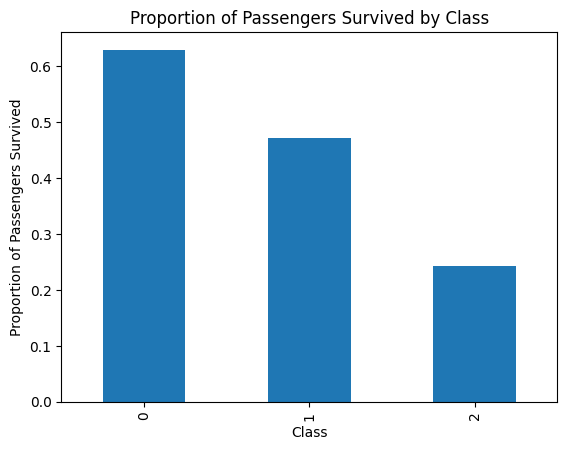

In [40]:
survived_by_class = df.groupby("class")["survived"].mean()
survived_by_class.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Proportion of Passengers Survived")
plt.title("Proportion of Passengers Survived by Class")
plt.show()

12. Plotting the age distribution of passengers, distinguishing between those who survived and those who didn't

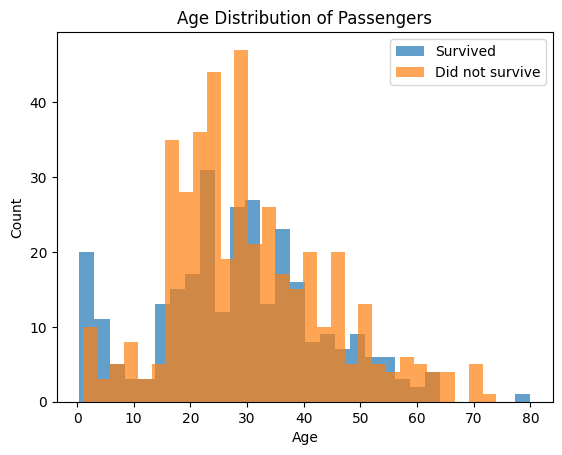

In [45]:
plt.hist(df[df["survived"] == 1]["age"], bins=30, alpha=0.7, label="Survived")
plt.hist(df[df["survived"] == 0]["age"], bins=30, alpha=0.7, label="Did not survive")

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.legend()
plt.show()

13. Creating a scatter plot showing the relationship between age and fare paid, color-coded by survival

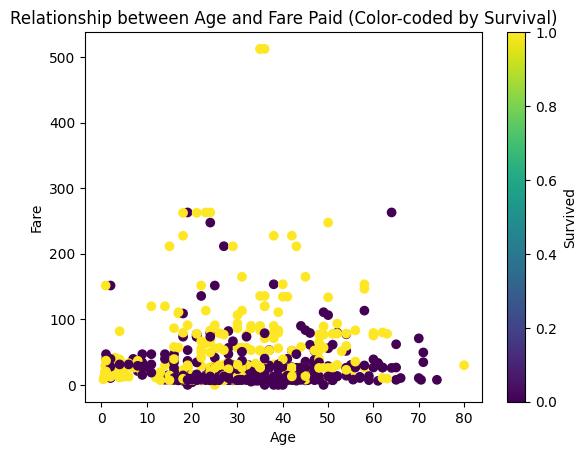

In [42]:
plt.scatter(df["age"], df["fare"], c=df["survived"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Relationship between Age and Fare Paid (Color-coded by Survival)")
plt.colorbar(label="Survived")
plt.show()

14. Creating a pivot table to show the average fare and survival rate for each class and sex combination

In [43]:
pivot_table = df.pivot_table(
    values=["fare", "survived"],
    index=["class", "sex"],
    aggfunc={"fare": "mean", "survived": "mean"},
)
print(pivot_table)

                 fare  survived
class sex                      
0     0    106.125798  0.968085
      1     67.226127  0.368852
1     0     21.970121  0.921053
      1     19.741782  0.157407
2     0     16.118810  0.500000
      1     12.661633  0.135447


15. And finally, plotting a grouped bar chart using Matplotlib to show the average fare paid by passengers, grouped by their class and survival status

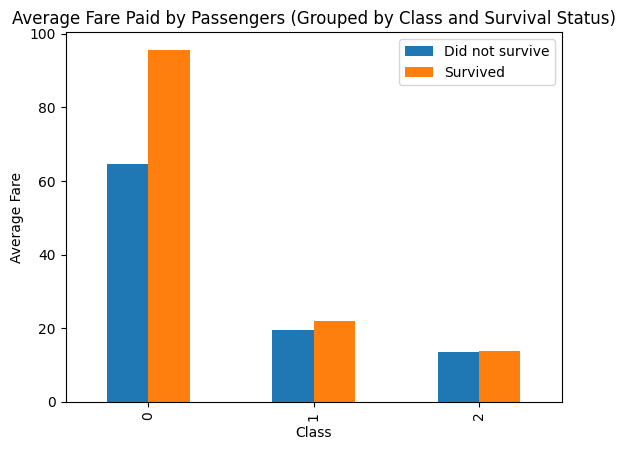

In [44]:
grouped_data = df.groupby(["class", "survived"])["fare"].mean()
grouped_data.unstack().plot(kind="bar")

plt.xlabel("Class")
plt.ylabel("Average Fare")
plt.title("Average Fare Paid by Passengers (Grouped by Class and Survival Status)")
plt.legend(["Did not survive", "Survived"])
plt.show()

## Scientists Salaries

This dataset(`task2.csv`), which focuses on data scientist salaries across different regions from 2020 to 2024.

### Questions Task 2

1. At first, it's better to do some pre-analysis to delete duplicates and NA (missing) data if they exist. Then, since salaries are inherently tied to each respective country's currency, we need to standardize them to a single currency for meaningful comparisons. We begin by identifying the currencies present in the dataset. Given the many currencies, let's examine their frequencies and remove data associated with currencies represented fewer than ten times

2. In this phase, we'll convert these currencies to USD. You can do this in two ways: manually searching for the exchange rates via online resources such as Google or utilizing software packages like Forex-Python for streamlined conversion.

3. Now, leveraging the insights gleaned from your dataset, We employ various Exploratory Data Analysis(EDA) techniques to extract valuable insights. For instance, we could identify the top 10 most popular job titles or the top 10 highest salaries.

## Resources